# Exploratory Data Analysis

# Load packages

In [1]:
from data import load_data
from preprocessing import preprocess
from plotting import (plot_salary_hist, plot_group_median_salary, plot_salary_scatter)
import polars as pl
import matplotlib.pyplot as plt
from IPython.display import display



c:\Users\miona\miniconda3\envs\d100_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download data

In [2]:
df = load_data()
print(df)

shape: (15_000, 19)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ job_id  ┆ job_title  ┆ salary_us ┆ salary_cu ┆ … ┆ applicati ┆ job_descr ┆ benefits_ ┆ company_n │
│ ---     ┆ ---        ┆ d         ┆ rrency    ┆   ┆ on_deadli ┆ iption_le ┆ score     ┆ ame       │
│ str     ┆ str        ┆ ---       ┆ ---       ┆   ┆ ne        ┆ ngth      ┆ ---       ┆ ---       │
│         ┆            ┆ i64       ┆ str       ┆   ┆ ---       ┆ ---       ┆ f64       ┆ str       │
│         ┆            ┆           ┆           ┆   ┆ str       ┆ i64       ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ AI00001 ┆ AI         ┆ 90376     ┆ USD       ┆ … ┆ 2024-11-0 ┆ 1076      ┆ 5.9       ┆ Smart     │
│         ┆ Research   ┆           ┆           ┆   ┆ 7         ┆           ┆           ┆ Analytics │
│         ┆ Scientist  ┆           ┆           ┆   ┆           ┆       

# Cleaning data

In [3]:
df = preprocess(df)
df.head()

job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,company_area,industry_group,skills_list,num_skills
str,str,i64,str,str,str,str,str,str,i64,str,str,i64,str,date,date,i64,f64,str,str,str,list[str],u32
"""AI00001""","""AI Research Scientist""",90376,"""USD""","""SE""","""CT""","""China""","""M""","""China""",50,"""Tableau, PyTorch, Kubernetes, …","""Bachelor""",9,"""Automotive""",2024-10-18,2024-11-07,1076,5.9,"""Smart Analytics""","""Asia""","""Manufacturing""","[""Tableau"", ""PyTorch"", … ""NLP""]",5
"""AI00002""","""AI Software Engineer""",61895,"""USD""","""EN""","""CT""","""Canada""","""M""","""Ireland""",100,"""Deep Learning, AWS, Mathematic…","""Master""",1,"""Media""",2024-11-20,2025-01-11,1268,5.2,"""TechCorp Inc""","""North America""","""Media & Entertainment""","[""Deep Learning"", ""AWS"", … ""Docker""]",5
"""AI00003""","""AI Specialist""",152626,"""USD""","""MI""","""FL""","""Switzerland""","""L""","""South Korea""",0,"""Kubernetes, Deep Learning, Jav…","""Associate""",2,"""Education""",2025-03-18,2025-04-07,1974,9.4,"""Autonomous Tech""","""Europe""","""Public & Social""","[""Kubernetes"", ""Deep Learning"", … ""NLP""]",5
"""AI00004""","""NLP Engineer""",80215,"""USD""","""SE""","""FL""","""India""","""M""","""India""",50,"""Scala, SQL, Linux, Python""","""PhD""",7,"""Consulting""",2024-12-23,2025-02-24,1345,8.6,"""Future Systems""","""Asia""","""Consulting""","[""Scala"", ""SQL"", … ""Python""]",4
"""AI00005""","""AI Consultant""",54624,"""EUR""","""EN""","""PT""","""France""","""S""","""Singapore""",100,"""MLOps, Java, Tableau, Python""","""Master""",0,"""Media""",2025-04-15,2025-06-23,1989,6.6,"""Advanced Robotics""","""Europe""","""Media & Entertainment""","[""MLOps"", ""Java"", … ""Python""]",4


# Describe data

- Shape of data

In [4]:
print("rows, cols:", df.shape)

rows, cols: (15000, 23)


- dtypes of data

In [5]:
df.schema

Schema([('job_id', String),
        ('job_title', String),
        ('salary_usd', Int64),
        ('salary_currency', String),
        ('experience_level', String),
        ('employment_type', String),
        ('company_location', String),
        ('company_size', String),
        ('employee_residence', String),
        ('remote_ratio', Int64),
        ('required_skills', String),
        ('education_required', String),
        ('years_experience', Int64),
        ('industry', String),
        ('posting_date', Date),
        ('application_deadline', Date),
        ('job_description_length', Int64),
        ('benefits_score', Float64),
        ('company_name', String),
        ('company_area', String),
        ('industry_group', String),
        ('skills_list', List(String)),
        ('num_skills', UInt32)])

- Descriptive statistics of data

In [6]:
num_cols = ["salary_usd", "years_experience", "job_description_length", "benefits_score", "remote_ratio"]
df.select([c for c in num_cols if c in df.columns]).describe()

statistic,salary_usd,years_experience,job_description_length,benefits_score,remote_ratio
str,f64,f64,f64,f64,f64
"""count""",15000.0,15000.0,15000.0,15000.0,15000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",115348.965133,6.2532,1503.314733,7.504273,49.483333
"""std""",60260.940438,5.545768,576.127083,1.45087,40.812712
"""min""",32519.0,0.0,500.0,5.0,0.0
"""25%""",70180.0,2.0,1004.0,6.2,0.0
"""50%""",99724.0,5.0,1512.0,7.5,50.0
"""75%""",146407.0,10.0,2000.0,8.8,100.0
"""max""",399095.0,19.0,2499.0,10.0,100.0


# Distribution of Global AI Job Salary

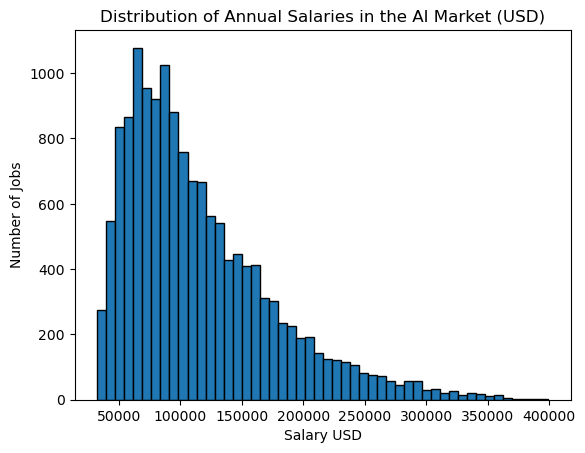

In [7]:
plot_salary_hist(df)

The salary distribution is right-skewed, with the majority of workers earning between $50,000 and $100,000, while a small number of highly skilled workers receive exceptionally high salaries.

# Check whether there are missing values or outliers

- Missing Values

In [8]:
df.null_count()

job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,company_area,industry_group,skills_list,num_skills
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing values are present in the cleaned dataset, as confirmed by a variable-level inspection of null counts.

- Outliers

In [9]:
def outlier_bounds_quantile(df: pl.DataFrame, col: str, lo_q=0.05, hi_q=0.95):
    b = df.select(
        pl.col(col).quantile(lo_q).alias("lo"),
        pl.col(col).quantile(hi_q).alias("hi"),
    ).row(0)
    return float(b[0]), float(b[1])

lo, hi = outlier_bounds_quantile(df, "salary_usd", 0.05, 0.95)
lo, hi

(46575.0, 237987.0)

In [10]:
outliers = df.filter((pl.col("salary_usd") < lo) | (pl.col("salary_usd") > hi))
outliers.select(["job_id","salary_usd","job_title","company_location"]).head(10)

job_id,salary_usd,job_title,company_location
str,i64,str,str
"""AI00029""",42819,"""Head of AI""","""Ireland"""
"""AI00039""",41430,"""AI Specialist""","""China"""
"""AI00049""",288815,"""AI Specialist""","""Switzerland"""
"""AI00068""",316182,"""Machine Learning Engineer""","""Denmark"""
"""AI00080""",284486,"""AI Research Scientist""","""United States"""
"""AI00087""",33314,"""Autonomous Systems Engineer""","""Israel"""
"""AI00099""",290199,"""Machine Learning Researcher""","""Switzerland"""
"""AI00132""",42835,"""AI Software Engineer""","""South Korea"""
"""AI00135""",258637,"""AI Product Manager""","""United Kingdom"""


One possible approach is to treat observations above the 95th percentile and below the 5th percentile as outliers.

# Feature correlations with AI Job Salary

shape: (1, 5)
┌──────────────────┬────────────────────────┬────────────────┬──────────────┬────────────┐
│ years_experience ┆ job_description_length ┆ benefits_score ┆ remote_ratio ┆ num_skills │
│ ---              ┆ ---                    ┆ ---            ┆ ---          ┆ ---        │
│ f64              ┆ f64                    ┆ f64            ┆ f64          ┆ f64        │
╞══════════════════╪════════════════════════╪════════════════╪══════════════╪════════════╡
│ 0.737556         ┆ -0.009092              ┆ 0.000985       ┆ 0.013727     ┆ -0.012879  │
└──────────────────┴────────────────────────┴────────────────┴──────────────┴────────────┘


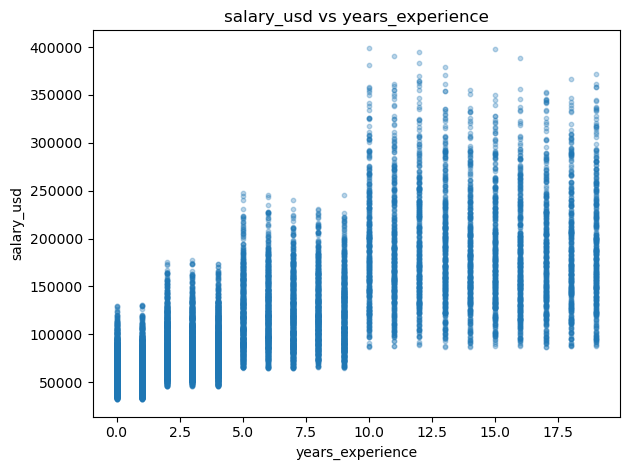

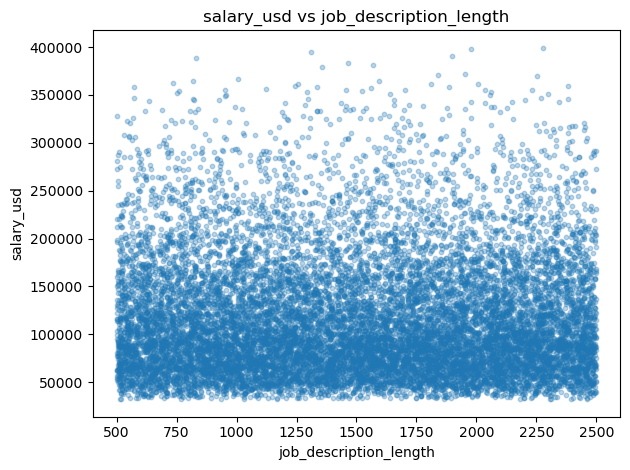

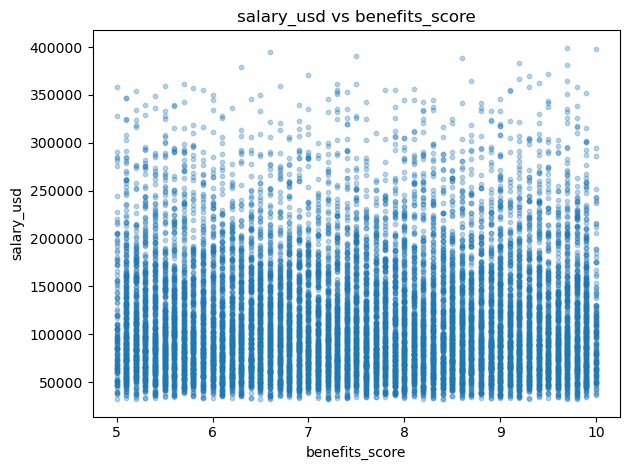

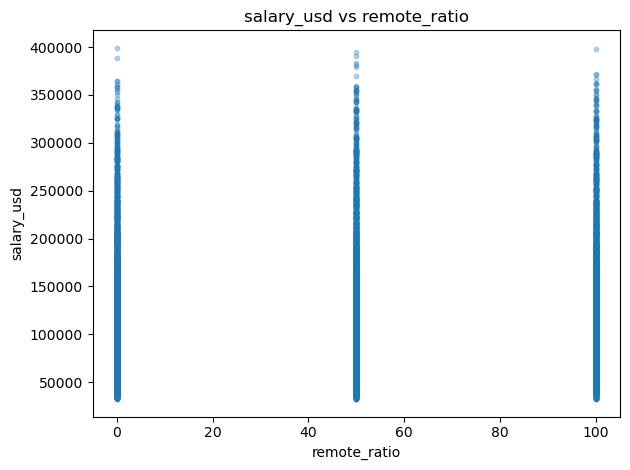

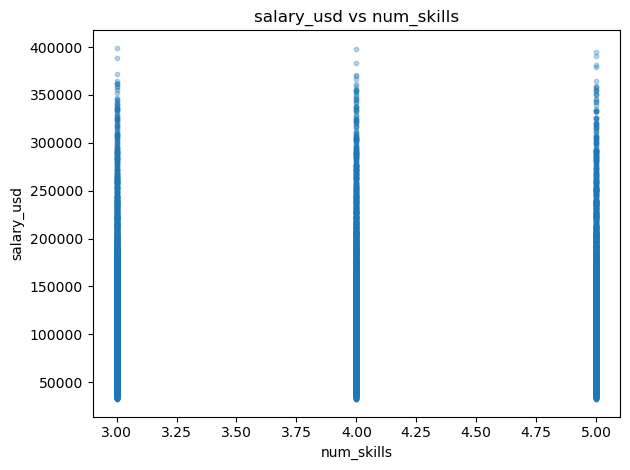

In [25]:
corr_cols = ["years_experience", "job_description_length", "benefits_score", "remote_ratio","num_skills"]
corr = (
    df.select(
        [pl.corr(pl.col(c), pl.col("salary_usd")).alias(c) for c in corr_cols if c in df.columns]
    )
)
print(corr)

plot_salary_scatter(df,corr_cols)

In the AI job market, while salary is positively correlated with years of experience, its correlations with job description length (a proxy for the complexity and informational content of the posting), benefits score (a measure of the generosity of non-wage benefits),remote ratio (the extent to which a position allows remote work) and number of required skills are relatively weak.

# What features can we use for the prediction of AI Job Salary?

- For quantitative variables, years of experience are informative. What about qualitative variables?

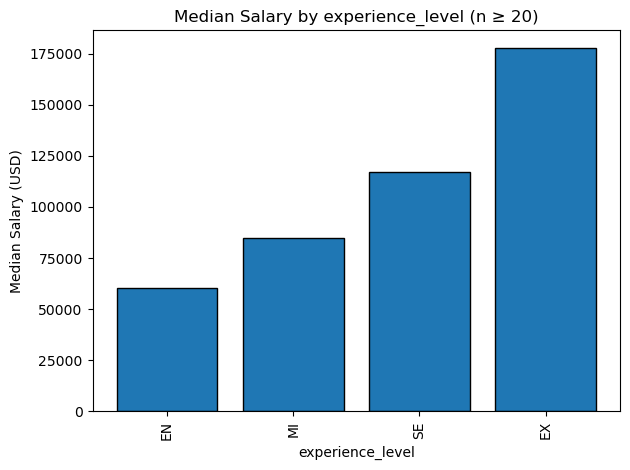

In [18]:
plot_group_median_salary(df, "experience_level" ,order=["EN", "MI", "SE", "EX"])


EN = Entry-level、MI = Mid-level、SE = Senior-level、EX = Executive-level
Higher experience levels are associated with higher salaries.

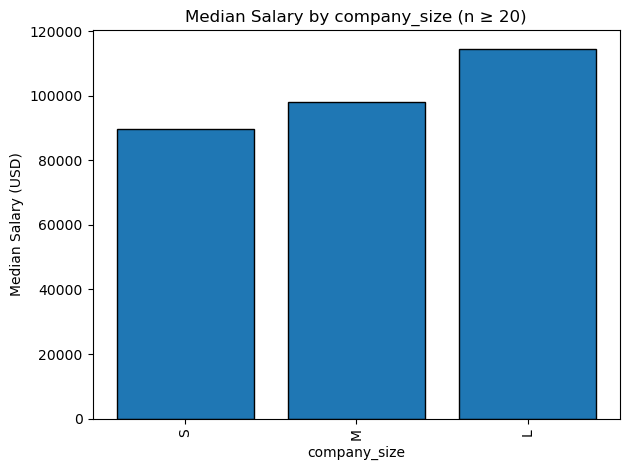

In [19]:
plot_group_median_salary(df, "company_size", order=["S", "M", "L"])


Larger companies tend to offer higher salaries.

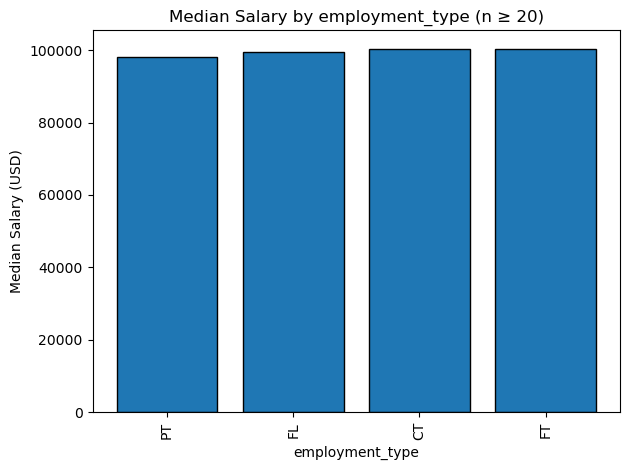

In [20]:
plot_group_median_salary(df, "employment_type", order=["PT", "FL", "CT", "FT"])


PT = Part-time、FL = Freelance、CT = Contract、FT = Full-time
While differences are modest, part-time positions tend to offer slightly lower salaries.

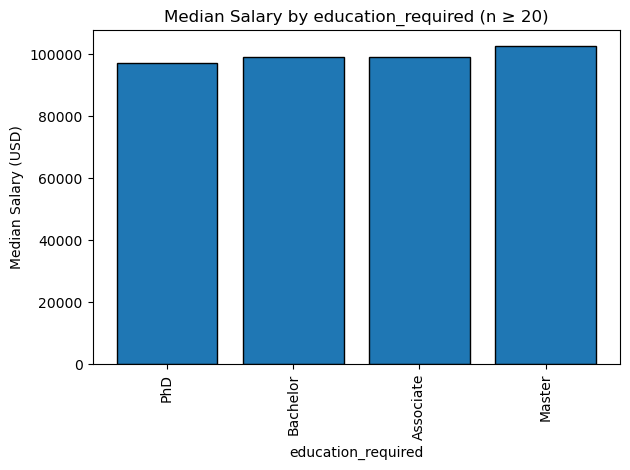

In [21]:
plot_group_median_salary(df, "education_required")


While differences are modest, employees with a master’s degree earn slightly higher salaries.

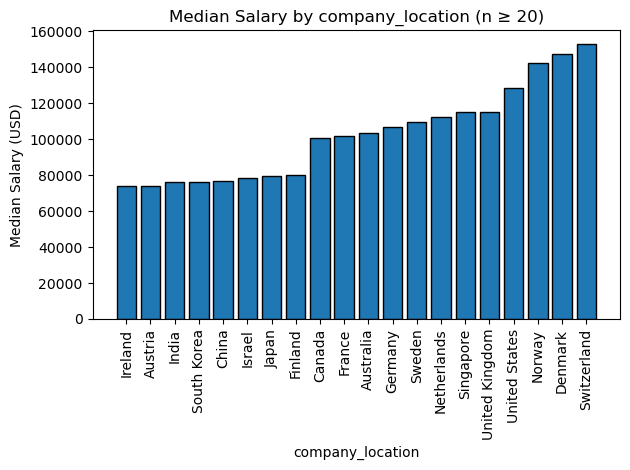

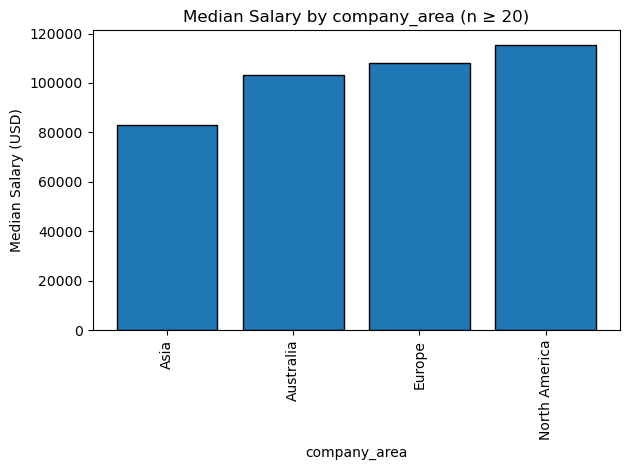

In [22]:
plot_group_median_salary(df, "company_location")
plot_group_median_salary(df, "company_area")

Salaries vary substantially across countries; regionally, North America and Europe offer higher pay, while Asia is relatively lower.

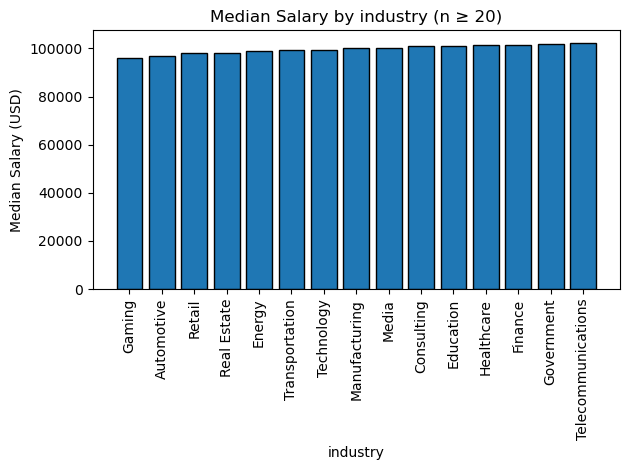

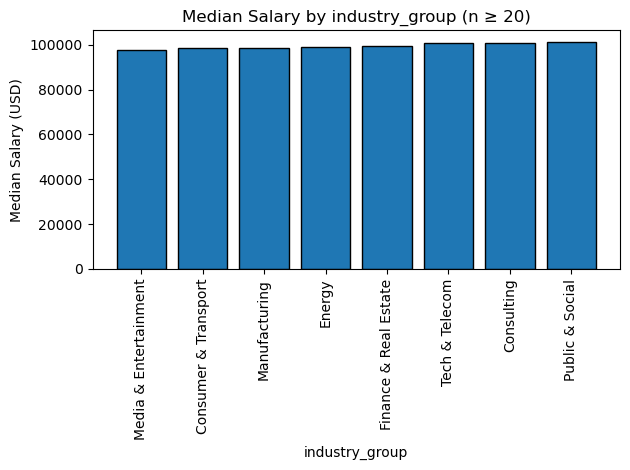

In [23]:
plot_group_median_salary(df, "industry")
plot_group_median_salary(df, "industry_group")

While there are modest differences across industries, no clear pattern emerges even after grouping.